In [1]:
!pip install qiskit qiskit_ibm_runtime pylatexenc qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.9/363.9 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 6.7 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256

In [2]:
import qiskit as qs
import qiskit_ibm_runtime as qs_ibm
from qiskit_aer import AerSimulator
from qiskit import QuantumRegister, AncillaRegister, QuantumCircuit, ClassicalRegister, transpile
from qiskit.circuit.library import C4XGate, C3XGate
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, array_to_latex

from qiskit_ibm_runtime import QiskitRuntimeService, Batch, Sampler

import math

## Zadanie 1
Używając dowolnego dokładnego symulatora (IBM statevector simulator albo QUIDE) stwórz odpowiedni obwód i potwierdź swoje wyliczenia z zadania obliczeniowego

In [ ]:
def one_step(qc_wandering):
  #apply hadamard gate to the output register (coin)
  qc_wandering.h(2)

  qc_wandering.barrier()
  #apply increment gate
  qc_wandering.ccx(2,1, 0)
  qc_wandering.cx(2,1)

  qc_wandering.barrier()
  #apply decrement gate
  qc_wandering.x([1,2])
  qc_wandering.ccx(2,1, 0)
  qc_wandering.x(1)
  qc_wandering.cx(2,1)
  qc_wandering.x(2)

  qc_wandering.barrier()

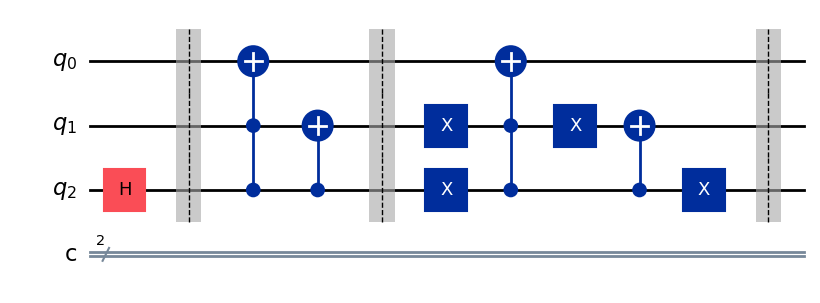

In [10]:
qc_wandering1 = QuantumCircuit(3, 2)
one_step(qc_wandering1)
qc_wandering1.draw(output='mpl', fold=-1)

In [11]:
state1 = Statevector.from_instruction(qc_wandering1)

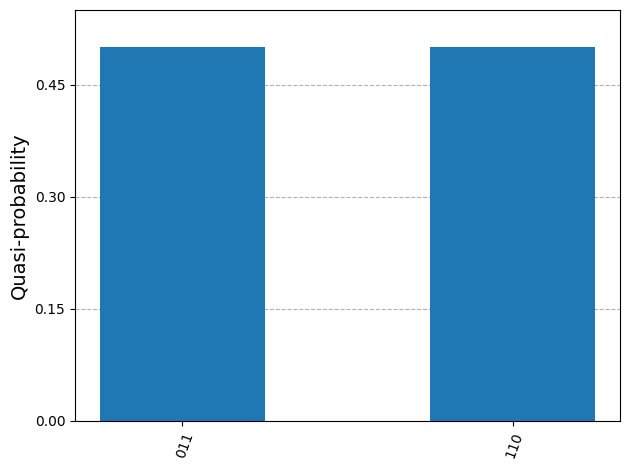

In [12]:
binary_prob = [state1.probabilities_dict()]
plot_histogram(
    binary_prob,
    bar_labels=False
)

--------------------

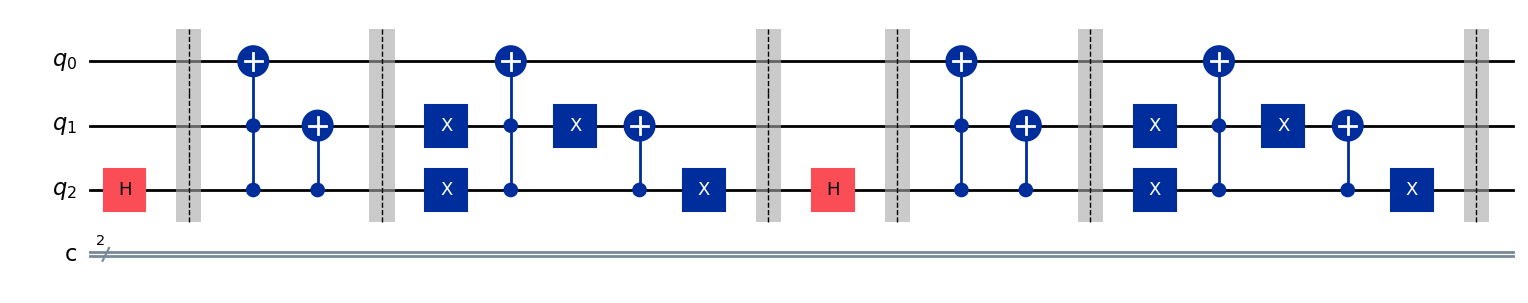

In [13]:
qc_wandering2 = QuantumCircuit(3, 2)
for i in range(2):
  one_step(qc_wandering2)
qc_wandering2.draw(output='mpl', fold=-1)

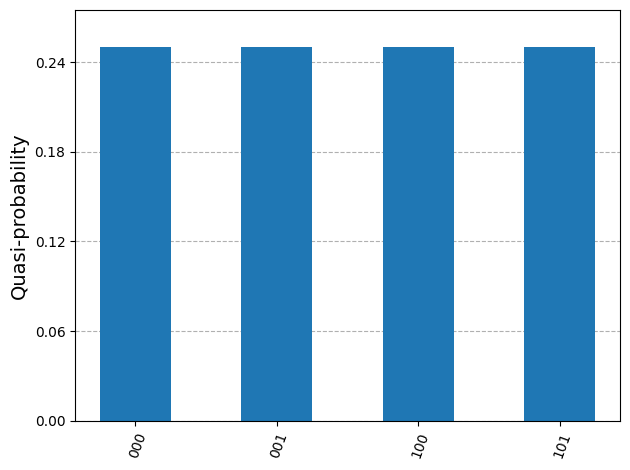

In [14]:
state2 = Statevector.from_instruction(qc_wandering2)
binary_prob = [state2.probabilities_dict()]
plot_histogram(
    binary_prob,
    bar_labels=False,
)

--------------

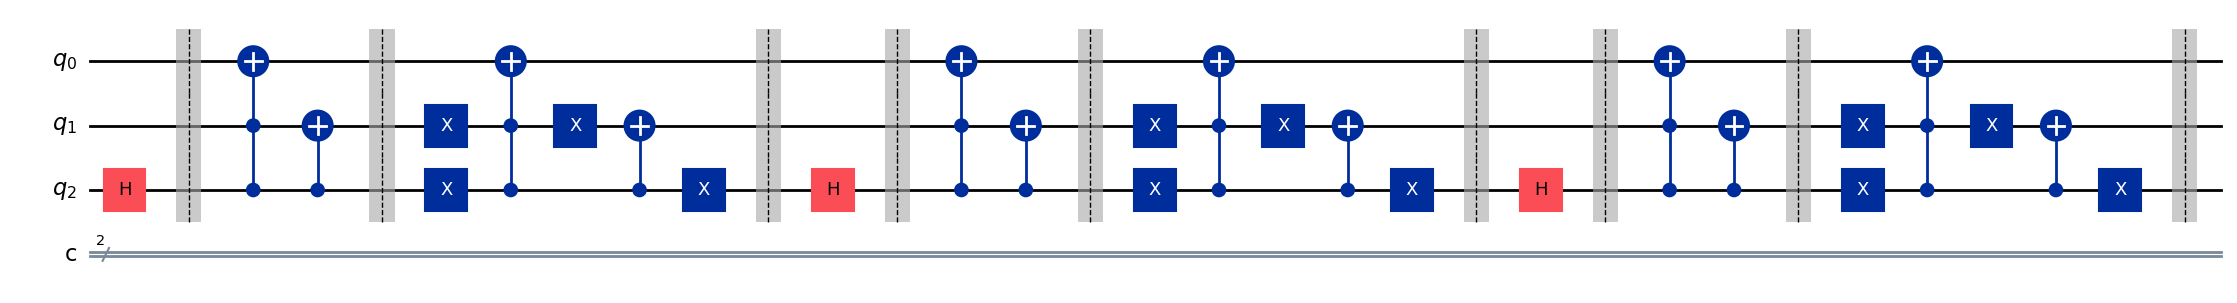

In [15]:
qc_wandering3 = QuantumCircuit(3, 2)
for i in range(3):
  one_step(qc_wandering3)
qc_wandering3.draw(output='mpl', fold=-1)

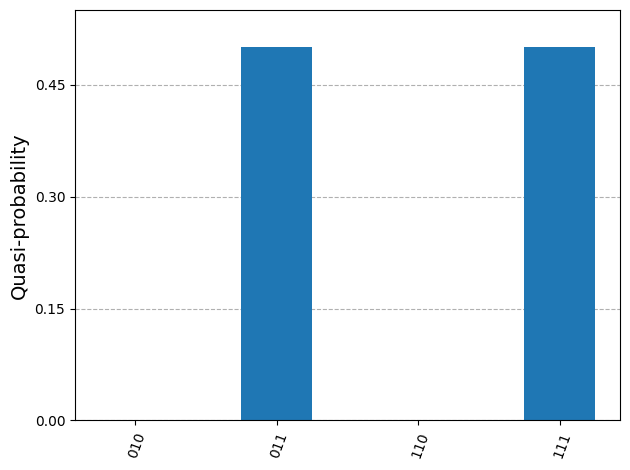

In [16]:
state3 = Statevector.from_instruction(qc_wandering3)
binary_prob = [state3.probabilities_dict()]
plot_histogram(
    binary_prob,
    bar_labels=False,
)

-----------------

## Zadanie 2
Uruchom układ dla 1,2 i 3 kroków używając wybranego symulatora oraz wybranego prawdziwego urządzenia kwantowego, tak aby porównać histogramy.  Zaobserwuj jak błędy zwiększają się wraz z ilością kroków.


In [21]:
def read_token(filename="ibm_token.txt"):
    with open(filename, "r") as file:
        return file.readline().strip()

In [22]:
token = read_token()
QiskitRuntimeService.save_account(token=token, channel="ibm_quantum", overwrite=True)
service = QiskitRuntimeService()


<ipython-input-22-2b3141b1631e>:5: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud", "ibm_quantum_platform", and "local" will be the only valid channels. Open Plan users should migrate now.  All other users should review the migration guide (https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp)to learn when to migrate.
  service = QiskitRuntimeService()


In [23]:
backend = service.least_busy(simulator=False, operational=True)
backend.name

'ibm_brisbane'

In [24]:
#apply measurements
qc_wandering1.measure(0, 0)
qc_wandering1.measure(1, 1)

In [35]:
simulator = AerSimulator()

In [25]:
qc_wandering1_transpiled = transpile(qc_wandering1, backend, optimization_level=3, seed_transpiler=0)

with Batch(backend=backend):
    sampler = Sampler()
    job = sampler.run([qc_wandering1_transpiled], shots=256)
    result_brisbane1 = job.result()


/usr/local/lib/python3.11/dist-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:1129: UserWarning: IBM Quantum Platform is moving, and this version will be sunset on July 1. To get started on the new platform, read the migration guide at https://docs.quantum.ibm.com/migration-guides/classic-iqp-to-cloud-iqp
  warnings.warn(warning_message)


Wynik pomiaru: {'00': 9, '10': 87, '11': 150, '01': 10}


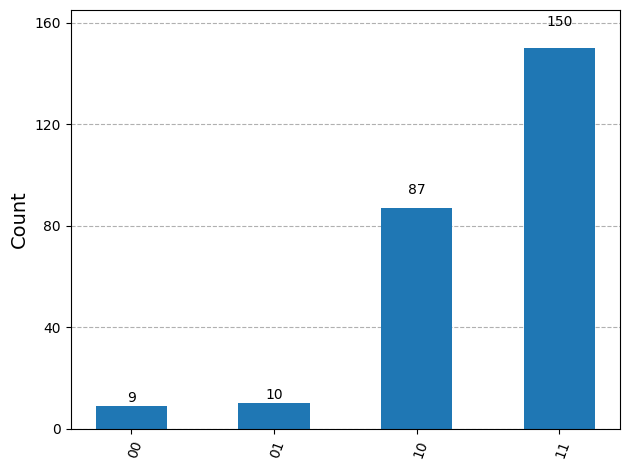

In [26]:
binary_prob1 = result_brisbane1[0].data.c.get_counts()
print("Wynik pomiaru:", binary_prob1)
plot_histogram(binary_prob1)

In [36]:
with Batch(backend=simulator):
    sampler = Sampler()
    job = sampler.run([qc_wandering1_transpiled], shots=256)
    result_smulator1 = job.result()


Wynik pomiaru: {'11': 142, '10': 114}


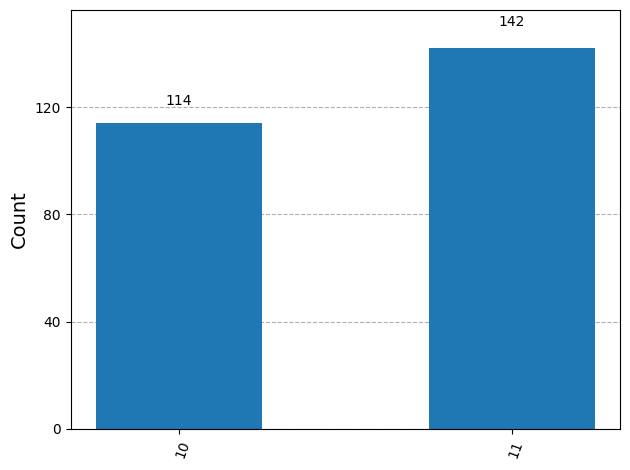

In [37]:
binary_prob_simulator1 = result_smulator1[0].data.c.get_counts()
print("Wynik pomiaru:", binary_prob_simulator1)
plot_histogram(binary_prob_simulator1)

In [27]:
#apply measurements
qc_wandering2.measure(0, 0)
qc_wandering2.measure(1, 1)

In [28]:
qc_wandering2_transpiled = transpile(qc_wandering2, backend, optimization_level=3, seed_transpiler=0)

with Batch(backend=backend):
    sampler = Sampler()
    job = sampler.run([qc_wandering2_transpiled], shots=256)
    result_brisbane2 = job.result()

/usr/local/lib/python3.11/dist-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:1129: UserWarning: IBM Quantum Platform is moving, and this version will be sunset on July 1. To get started on the new platform, read the migration guide at https://docs.quantum.ibm.com/migration-guides/classic-iqp-to-cloud-iqp
  warnings.warn(warning_message)


Wynik pomiaru: {'11': 16, '10': 26, '00': 105, '01': 109}


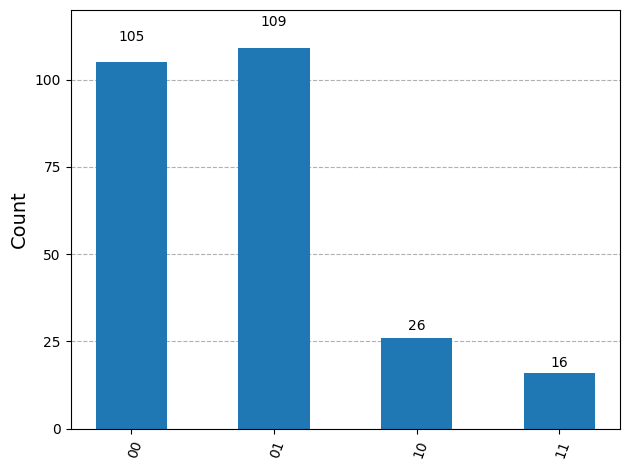

In [29]:
binary_prob2 = result_brisbane2[0].data.c.get_counts()
print("Wynik pomiaru:", binary_prob2)
plot_histogram(binary_prob2)

In [38]:
with Batch(backend=simulator):
    sampler = Sampler()
    job = sampler.run([qc_wandering2_transpiled], shots=256)
    result_smulator2 = job.result()


Wynik pomiaru: {'01': 149, '00': 107}


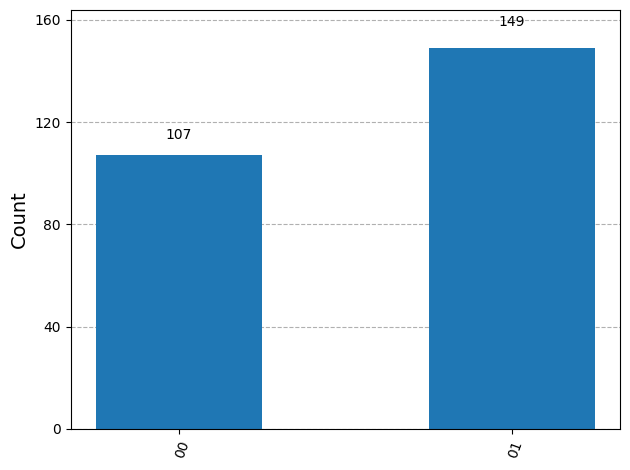

In [39]:
binary_prob_simulator2 = result_smulator2[0].data.c.get_counts()
print("Wynik pomiaru:", binary_prob_simulator2)
plot_histogram(binary_prob_simulator2)

In [30]:
#apply measurements
qc_wandering3.measure(0, 0)
qc_wandering3.measure(1, 1)

In [43]:
qc_wandering3_transpiled = transpile(qc_wandering3, backend, optimization_level=3, seed_transpiler=0)

with Batch(backend=backend):
    sampler = Sampler()
    job = sampler.run([qc_wandering3_transpiled], shots=256)
    result_brisbane3 = job.result()

/usr/local/lib/python3.11/dist-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:1129: UserWarning: IBM Quantum Platform is moving, and this version will be sunset on July 1. To get started on the new platform, read the migration guide at https://docs.quantum.ibm.com/migration-guides/classic-iqp-to-cloud-iqp
  warnings.warn(warning_message)


Wynik pomiaru: {'10': 63, '11': 144, '01': 22, '00': 27}


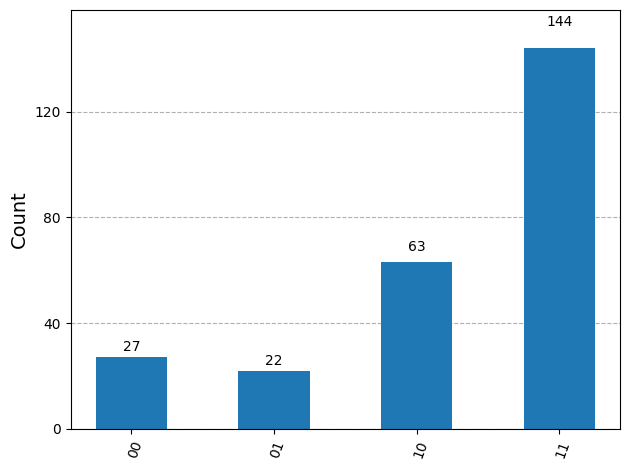

In [44]:
binary_prob3 = result_brisbane3[0].data.c.get_counts()
print("Wynik pomiaru:", binary_prob3)
plot_histogram(binary_prob3)

In [46]:
with Batch(backend=simulator):
    sampler = Sampler()
    job = sampler.run([qc_wandering3_transpiled], shots=256)
    result_smulator3 = job.result()


Wynik pomiaru: {'11': 256}


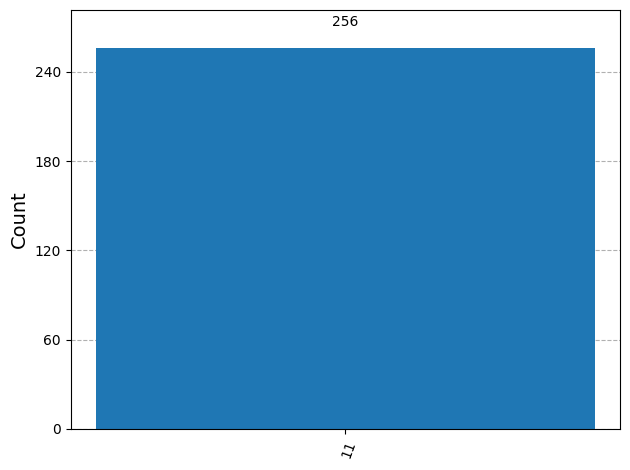

In [47]:
binary_prob_simulator3 = result_smulator3[0].data.c.get_counts()
print("Wynik pomiaru:", binary_prob_simulator3)
plot_histogram(binary_prob_simulator3)